In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('project_outliers_removed.csv')

In [3]:
# 1-Empty values
df.empty

False

In [4]:
# 2-NaN Values
def pct_missing_plot(df):
    
    pct_nan = 100 * df.isnull().sum() / len(df)
    pct_nan = pct_nan[pct_nan > 0].sort_values()
    
    plt.figure(figsize = (15, 5))
    sns.barplot(x = pct_nan.index, y = pct_nan);
    plt.xticks(rotation = 90);
    
    return pct_nan
   

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

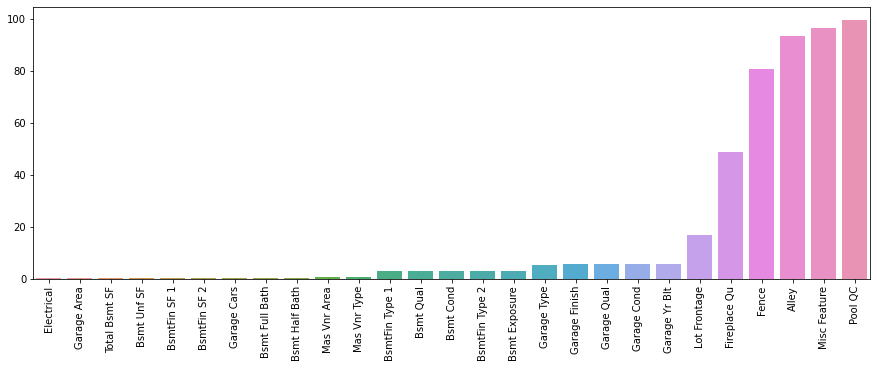

In [5]:
df_pct_missing = pct_missing_plot(df)
df_pct_missing

In [6]:
# For columns that have few missing values, should we drop or fill the rows? 
# We can look at the descripton to have an idea about what the nan values mean for that category.

# Electrical: Has no info for NaN. We can drop
# Garage Area: Has no info for NaN. We can drop
# Garage Cars: Has no info for NaN. We can drop 
# Total Bsmt SF: NA means no basement. We can fill, no need to drop.         
# Mas Vnr Area: NA means None. We can fill, no need to drop.  
# Mas Vnr Type: NA means None. We can fill, no need to drop.  

In [7]:
rows_to_drop = ['Electrical', 'Garage Area', 'Garage Cars']
df = df.dropna(axis = 0, subset = rows_to_drop)

In [8]:
# Basement numeric rows, fill nan with 0
bsmt_numeric_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_numeric_cols] = df[bsmt_numeric_cols].fillna(0)

# Basement string rows, fill nan with 'None'
bsmt_string_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_string_cols] = df[bsmt_string_cols].fillna('None')

In [9]:
# Mas Vnr Area, fill nan with 0
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

# Mas Vnr Type, fill nan with 'None'
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [10]:
# For columns that have intermediate missing values, should we drop or fill the column? 
# We can look at the descripton to have an idea about what the nan values mean for that category.

# Garage: NA means None. We can fill, no need to drop.  
# Fireplace: NA means None. We can fill, no need to drop.  
# Lot Frontage: Not clear what to do. Since it is a numeric value we need to analyze a bit.
#               It is related to 'neighborhood'. We can use it.

Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

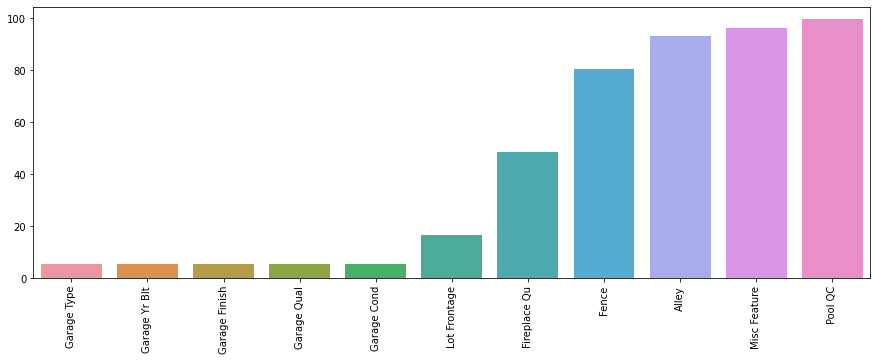

In [11]:
pct_missing_plot(df)

In [12]:
# Garage numeric rows, fill nan with 0
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

# Garage string rows, fill nan with 'None'
garage_string_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[garage_string_cols] = df[garage_string_cols].fillna('None')

In [13]:
# Fireplace string rows, fill nan with 'None'
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

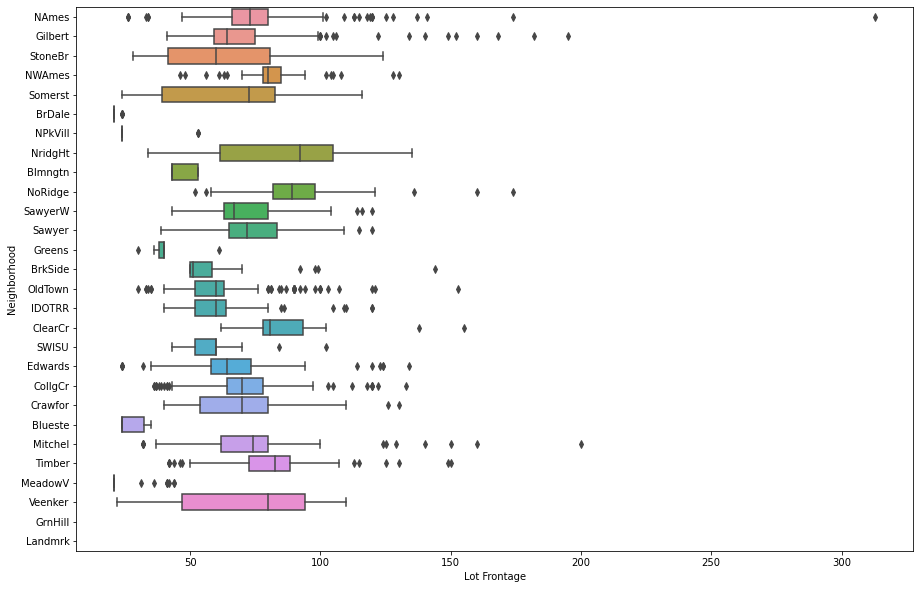

In [14]:
# Lot Frontage
plt.figure(figsize = (15, 10))
sns.boxplot(data = df, x = 'Lot Frontage', y = 'Neighborhood');

In [15]:
# We can use the mean of Lot Frontage vs Neighborhood
# If Neighborhood is also NaN fill with 0
df['Lot Frontage'] = df.groupby(by = 'Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [16]:
# For columns that have lot of missing values, should we drop or fill the column? 
# We can look at the descripton to have an idea about what the nan values mean for that category.

# We can drop Fence, Alley, Misc Feature, Pool QC since they are mostly NaN values.

Fence           80.478632
Alley           93.230769
Misc Feature    96.410256
Pool QC         99.589744
dtype: float64

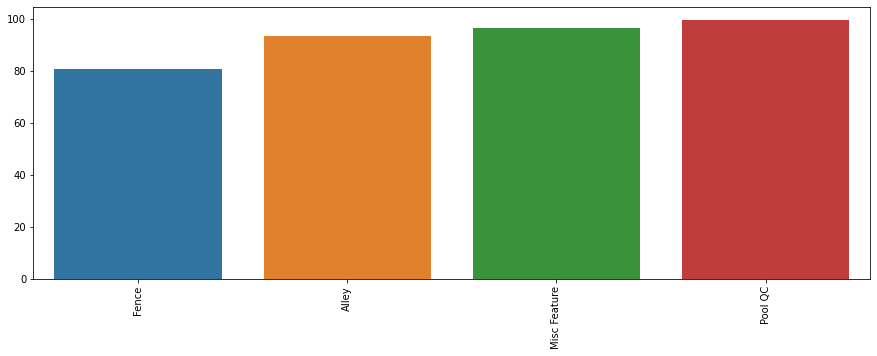

In [17]:
pct_missing_plot(df)

In [18]:
columns_to_drop = ['Fence', 'Alley', 'Misc Feature', 'Pool QC']
df = df.drop(columns_to_drop, axis = 1)

In [19]:
df.to_csv('project_missingvals_removed.csv', index = False)